# Neural network notes

Imagine we want to predict our score on a test (y) based on how many hours we slept and how long we studied (x).
Let's set up some training data.

In [1]:
import numpy as np

# x = (hours slept/hours studied)
X = np.array(([3,5], [5,1], [10,2]), dtype=float)

# y = score on test
y = np.array(([75], [82], [93]), dtype=float)

In [2]:
X

array([[  3.,   5.],
       [  5.,   1.],
       [ 10.,   2.]])

In [3]:
y

array([[ 75.],
       [ 82.],
       [ 93.]])

This is called a __supervised regression__ problem.

* _supervised_: examples have inputs (hours slept/hours studied) and outputs (score)
* _regression_:  we are predicting test score, which is a _continuous_ output

If we were prediciting a letter grade, it would be a __classification__ problem.

Anyway, to solve this problem, we will use an __aritificial neural network__ (ANN).

The first problem we have is that the input is in hours, but the output is a score of 100. To make sure our variables are on the same scale, let's divide each variable by the maximum for each variable.

In [4]:
X = X/np.amax(X, axis=0)
y = y/100 # Max test score is 100

In [5]:
X

array([[ 0.3,  1. ],
       [ 0.5,  0.2],
       [ 1. ,  0.4]])

In [6]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

 What will our network look like? We'll have 2 inputs -- hours of sleep and hours of study, and 1 output -- $\hat{y}$.
 
We call the output $\hat{y}$ because it's an estimate of y, but not the same as y.

The layers inbetween these inputs and outputs are __hidden layers__.

We'll use 1 hidden layer with 3 neurons.

<img src="images/neuralnet.jpg" alt="" style="width: 400px;"/>

Now, we're going to store all of our inputs in a matrix called X.

Then we'll store all of our weights in a matrix called W<sup>(1)</sup>.

Each element in matrix X gets put into the input neurons, multiplied by the weights connected to that neuron and then summed.

<img src="images/fp1.jpg" alt="" style="width: 400px;"/>

-->

<img src="images/fp2.jpg" alt="" style="width: 400px;"/>

Then we can just multiply all of these together to get the values for our neurons in our hidden layer. We'll call that resulting matrix Z<sup>(2)</sup>. To clarify, this Z matrix is the result of putting through all of our inputs multiplied by our weights.

<img src="images/matricesandweights.jpg" alt="" style="width: 400px;"/>

In Z, every entry is a sum of weighted inputs.
Z is 3x3:

* Row = 1 for each example
* Column = 1 for each hidden unit

In other words, each column is the values for the three examples for each of the neurons in the hidden layer.
Remember, we are putting through all of the data at once.

Anyway, this gives us our first formula:

__Z<sup>(2)</sup> = XW<sup>(1)</sup>__

Now that we have our values for each neuron in the hidden layer, we need to apply our activation function to it.

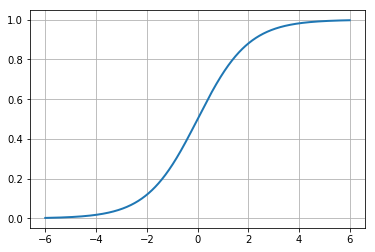

In [7]:
# For our activation function f, we'lluse sigmoid
# Reminder: sigmoid will be close to 0 when -ve, and close to 1 when +ve
%matplotlib inline
import matplotlib.pyplot as plt


def sigmoid(z):
    # Apply sigmoid activation function
    return 1/(1+np.exp(-z))

test_input = np.arange(-6, 6, 0.01)
plt.plot(test_input, sigmoid(test_input), linewidth=2)
plt.grid(1)

This gives us our second forward propagation formula:

__a<sup>(2)</sup> = f(z<sup>(2)</sup>)__, where f is our sigmoid -- acitivation -- function.

a<sup>(2)</sup> will also be a 3x3 matrix -- it's just our matrix Z run through sigmoid.

Now, to get our output, we need to multiply that value by our second layer weights, W<sub>(2)</sub>.

This gives us our third formula:

__Z<sub>(3)</sub> = a<sub>(2)</sub>W<sub>(2)</sub>__

<img src="images/w2.jpg" alt="" style="width: 400px;"/>


W<sub>(2)</sub> is a 3x1 matrix -- one weight for each synapse.

So applying it will give us another 3x1 matrix.

Finally, we'll just apply our activation function to that Z<sub>(3)</sub> matrix to get our official estimate.

So our last formula is:
__$\hat{y}$ = f(z<sub>(3)</sub>)__

In [8]:
# Let's create a neural network class
class Neural_Network(object):
    def __init__(self):
        # Define HyperParameters
        # HyperParameters: Define structure and behaviour of our network
        # but are not updated as we train the network.
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        # Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, \
                                  self.hiddenLayerSize)
        
        self.W2 = np.random.randn(self.hiddenLayerSize, \
                                  self.outputLayerSize)
        
    def forward(self, X):
        # Propagate inputs through the network
        # Sending through all inputs at once in a matrix is more efficient
        self.z2 = np.dot(X, self.W1) # z2 = all inputs * input weights, 3x3 matrix
        self.a2 = self.sigmoid(self.z2) # a2 = z2 squished into 0-1
        self.z3 = np.dot(self.a2, self.W2) # z3 = z2 * output weights
        y_hat = self.sigmoid(self.z3) # y_hat = z3 squished into 0-1
        return y_hat
    
    def sigmoid(self, z):
        # Apply sigmoid activation function
        return 1/(1+np.exp(-z))

In [9]:
network = Neural_Network()

In [10]:
network.W1

array([[ 1.3038088 ,  0.34656128, -1.02975353],
       [ 1.11114563, -1.38822095, -0.93497135]])

In [11]:
network.W2

array([[ 0.07035546],
       [ 1.31784677],
       [ 0.9372487 ]])

In [12]:
y_hat = network.forward(X)
y_hat

array([[ 0.63483297],
       [ 0.72806274],
       [ 0.69744815]])

With random weights, this network will obviously __not__ give good results!

We need to train it.

# Gradient Descent
To improve our network, we first need to work out exactly how wrong it is.

We do this by using a __cost function__. The higher the result of the cost function, the more wrong our model is.

One way to compute a cost function is:

1. For every output:
2. Work out the difference between the correct value and our result
3. Square this value
4. Multiply it by 0.5 (why? it will make things simpler apparently)
5. Sum all of these values up

Formally:

$J = \sum \frac{1}{2}(y-\hat{y})^2$

So, we want to minimize this cost function to make the network more accurate.

_Training a network == Minimizing the cost function_

So, how do we minimize the cost function? Well, by changing the weights.
Conceptually, this is quite simple -- there must be some combination of weights that will make our cost function as small as possible.

<img src="images/neural_net_notes/weightchanging.jpg" alt="" style="width: 400px;"/>

Our cost function is an expression in terms of y and $\hat{y}$, and $\hat{y}$ was given by our previous equations. Substituting $\hat{y}$ for the equations in our neural network that gave us $\hat{y}$, we get:

$J = \sum \frac{1}{2}(y-f(XW^{(1)})W^{(2)}))^2$

Now we want to know, what is the rate of change for J with respect to W. I.e., how does J change when we change W, our weights.

Well, remember calculus. This is a derivative. Specifically, since we just consider one weight at a time, it's a partial derivative.

$\frac{dJ}{dW}$

Recall that the gradient of a function consists of a vector with all of it's partial derivatives.

The gradient has another nice property -- it's the slope of steepest ascent.

Therefore, if we take the -ve gradient, we will be going downhill -- descending -- as quickly as possible.

So this is where __gradient descent__ comes in:

1. Compute the gradient of our function
2. Take a small step in the -gradient direction
3. Repeat until we've minimized our function

One issue is that we might hit a local minima instead of a global minima. This is one reason we square our differences in the cost function -- it tends to give us a parabola, which obviously won't have local minima.

Sometimes we can just take our input in batches instead of all at once, and it won't matter if the function is convex or not -- this is stochastic gradient descent (taking input in batches). But for now we'll process all input at once.

# Backpropagation
We have 2 sets of weights -- input weights and output weights.

We'll calculate the derivative of these weights indiviually.

<img src="images/neural_net_notes/weightmatrices.jpg" alt="" style="width: 400px;"/>

Let's take $W^{(2)}$ first:

$\frac{\partial{J}}{\partial{W^{(2)}}} = \frac{\partial{\sum \frac{1}{2}(y-\hat{y})^2}}{\partial{W^{(2)}}}$

(Recall J is the sum of all our error scores.)

We can use the sum rule: the derivative of the sum == the sum of the derivatives.

So move the sum outside, and just worry about the derivative of the inside expression:

$\frac{\partial{J}}{\partial{W^{(2)}}} = \sum \frac{\partial{\frac{1}{2}(y-\hat{y})^2}}{\partial{W^{(2)}}}$

Crunching through the derivative with the power rule and then chain rule, we come to:

$-(y-\hat{y})\frac{\partial{\hat{y}}}{\partial{W^{(2)}}}$

-- We need to take the derivative of $\hat{y}$ with respect to W.

Recall that $\hat{y} = f(Z^{(3)})$ -- y hat is the activation function applied to z3. (z3 was our output from the hidden layer * output weights).

So we apply the chain rule again:

$-(y-\hat{y})\frac{\partial{\hat{y}}}{\partial{Z^{(3)}}}\frac{\partial{Z^{(3)}}}{\partial{W^{(2)}}}$

Reminder: we can express the chain rule as the product of derivatives (and in multivariable calculus, we differentiate the function with respect to its X parameter, and then we differentiate the X parameter expression, which may also be a function, for example. Like, we have a function that takes a function as a parameter. What is the derivative? Well, it's the change caused by that inner function to the outer function, and the change caused by the parameter to the inner function on the inner function. Hence you have the two changes -- the two derivatives -- multiplied together). Anyway:

$\frac{\partial{Z}}{\partial{X}} = \frac{\partial{Z}}{\partial{Y}}\frac{\partial{Y}}{\partial{X}}$

To differentiate $\hat{y}$ with respect to $Z^{(3)}$, we need need to differentiate our sigmoid function with respect to Z.

In [13]:
def sigmoid_prime(z):
    # Derivative of Sigmoid function
    return np.exp(-z)/((1+np.exp(-z))**2)

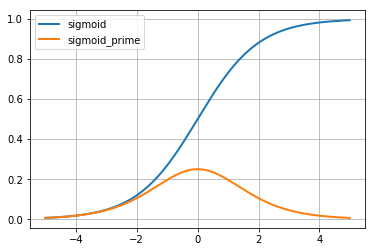

In [14]:
# The derivative will be largest where our function is the steepest
test_values = np.arange(-5, 5, 0.01)

plt.plot(test_values, sigmoid(test_values), linewidth=2)
plt.plot(test_values, sigmoid_prime(test_values), linewidth=2)
plt.grid(1)
plt.legend(['sigmoid', 'sigmoid_prime'])data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXcAAAD8CAYAAACMwORRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvpW3flQAAIABJREFUeJzt3Xl8VNX9//HXyb6ShIQESAIB2SHIEoIbElCRTSitCtSNUou/VlyqWLVWS7XUYl2/VVGKa6vgjiDgghLZJewQlshOCJAFsq8zc35/3BBCCGSAmdxZPs/HYx6Z5c6dzyHhnZtzzz1Haa0RQgjhWXzMLkAIIYTjSbgLIYQHknAXQggPJOEuhBAeSMJdCCE8kIS7EEJ4IAl3IYTwQBLuQgjhgSTchRDCA/mZ9cExMTE6KSnJrI+/aGVlZYSGhppdRrOSNnsHb2uzu7Z3w4YN+VrrVk1tZ1q4JyUlsX79erM+/qKlp6eTlpZmdhnNStrsHbytze7aXqXUQXu2k24ZIYTwQBLuQgjhgSTchRDCAzXZ566UehsYDeRqrXs18roCXgFGAuXAJK31xosppqamhuzsbCorKy/m7c0iIiKCnTt3ml1GszpXm4OCgkhISMDf39+EqoQQ52PPCdV3gVeB98/x+gigc+1tIDCr9usFy87OJjw8nKSkJIzfGa6npKSE8PBws8toVo21WWtNQUEB2dnZdOjQwaTKhBDn0mS3jNZ6OXDiPJuMBd7XhrVApFKqzcUUU1lZSXR0tMsGuzhNKUV0dLRL/5UlhDdzRJ97PHC43uPs2ucuigS7+5DvlRCuyxHj3Bv7H97o2n1KqSnAFIC4uDjS09PPeD0iIoKSkhIHlOQ8VqvV5Wt0tPO1ubKy8qzvoycoLS31yHadj7e12RHttdg0FRYoq9GUWzTlNZqyGiiv0VRYNZUWqLRoKq3G16rar92jfflFpwDHNOQcHBHu2UBivccJQE5jG2qtZwOzAVJSUnTDCwh27tzpkv3Zd999Nw899BA9evRwWp/7yJEj+fDDD4mMjDzj+enTpxMWFsa0adMc/pn2Ol+bg4KC6Nu3bzNX5HzueoHLpfC2NjfW3rIqCwWl1eSVVlFQWkV+aXXt1yryy4z7heU1FFXUUFxRQ1m19aI++7KEWNLS+jugFefmiHBfAExVSs3DOJFapLU+6oD9uow5c+Y4/TMWL17s9M8QwptVWaxkn6zgaGElOUUVrNlTzdcFW8kpquRoYQVHiyoprbJc0D6VghZB/kQE+9Mi2M/4Wvs4LNCP0EC/uq+hgb6EBhj3W0cEOamVp9kzFHIukAbEKKWygb8C/gBa6zeAxRjDIPdgDIX8jbOKbQ5lZWXceuutZGdnY7VaefLJJ5k1axbPP/88KSkpvP/++7zyyiu0bduWzp07ExgYyKuvvsqkSZMIDg5m165dHDx4kHfeeYf33nuPNWvWMHDgQN59910A5s6dyz/+8Q+01owaNYqZM2cCp6djiImJYcaMGbz//vskJibSqlUr+vd37m94ITyFxWrjQEE5B/LLOFBQe8sv50BBGTmFFdjO6jA+fMajQD8fYsICiQkPJCY0gOiwAGLCAokOCyQmLIDo0ECiQmsDPMSfsAA/fHxc89xTk+GutZ7YxOsauNdhFdVKemyRo3cJwIF/jjrv619//TVt27Zl0SLj84uKipg1axYAOTk5PPfcc2zatInw8HCGDh3K5ZdfXvfekydP8sMPP7BgwQJuuukmVq1axZw5cxgwYACbN28mNjaWRx99lA0bNhAVFcWwYcOYP38+v/jFL+r2sWHDBubNm8emTZuwWCz069dPwl2IBrTWHC+uYtexYnYfK2FX7W1vbinVVluj7/FRkBAVTHxkMG0jg6kpymVg767ERwbRJiKYthHBtAj285iBAqZNHOaqkpOTmTZtGo8++iijR49m0KBBda+tW7eOq6++mpYtWwJwyy23kJWVVff6TTfdhFKK5ORk4uLiSE5OBqBnz54cOHCAgwcPkpaWRqtWxoRut912G8uXLz8j3FesWMG4ceMICQkBYMyYMU5vsxCurrC8mi3ZRWw+VMiW7EK2HC6koKy60W3jI4Pp2CqUpOhQkmJCSYoOISkmlMSoEAL8Tg8QTE9PJ+2K9s3VhGbnsuHe1BG2s3Tp0oUNGzawePFiHn/8cYYNG1b3mvFHyrkFBgYC4OPjU3f/1GOLxYKfn33/3J5y5CDExTpSWMHavQWs2VfAhoMn2Z9fdtY2EcH+dG0dTrfW4bVfW9AlLozwILliGlw43M2Sk5NDy5Ytuf322wkLC6vrKwdITU3lwQcf5OTJk4SHh/PZZ5/VHZ3bY+DAgTzwwAPk5+cTFRXF3Llzue+++87Y5tprr2XSpEk89thjWCwWFi5cyD333OOo5gnhkk6WVbP85zxW7zEC/dCJ8jNeD/TzoVd8BH0SI7k8MZI+CZEktgyWA6HzkHBvYNu2bTzyyCP4+Pjg7+/PrFmz6oYhxsfH8/DDDzNw4EDatm1Ljx49iIiIsHvfbdq04dlnn2XIkCForRk5ciRjx449Y5t+/foxfvx4+vTpQ/v27c/oFhLCU2ityTpeyve7jvPDzlw2Hjp5xsnO8EA/Uju05MrLohnYIZpubcLx95V5Di+EaqqrwVlSUlJ0w8U6du7cSffu3U2px15Hjx6lTZs2WCwWxo0bx+TJkxk3bpzZZTnV+ca5u8P37GJ425hvcH6btdZsP1LMwq05LN52lOyTFXWv+fsqBnaIZlDnGK68LJqebSPwdfIoFHf9HiulNmitU5raTo7cL9Czzz7L8uXLqaysZNiwYWecDBVCnC3reAkLNuewcGsOBwtOd7fEhAUwpGss13WP5epOMdJX7mAS7hdoxowZLnkVrRCupLTKwsItOczLOMyWw4V1z8eEBTK6dxtG925Dv3ZRLjtG3BNIuAshHGb7kSL+t/YgC7fk1F2aHx7kx6jkNoy5vC0DO0Y7vbtFGCTchRCXxGbTfL8rlzkr9vHT/tOzg6cmtWT8gERGJrchOMDXxAq9k4S7EOKiVFmsfLw+m7dX7q8bhx4e6MetAxKZmNqOTrFhJlfo3STchRAXpMpi5eOMw7y2bC/Hio3FWuIjg5l8TQduTUmQE6MuQsJdCGGXGquNeRmHeX3ZHo4WGaHerXU4U4d2YnjP1vjJOHSXIt8NO9x9993s2LHDqZ8xcuRICgsLz3p++vTpPP/885e8//Xr13P//fdf8n6E99Fa892O49z40nKenL+do0WVdI0LZ9Zt/Vh8/yBG924rwe6C5MjdDu4+n7vFYiElJYWUlCavexDiDNuPFDFj0U7W7CsAoENMKNOGdWVEr9YyjNHFuW64T7f/sv4L22/ReV92t/nc09LS6NOnD+vWraO4uJi3336b1NRUpk+fTk5ODgcOHCAmJoYpU6bw/PPP89VXXzF9+nT279/P0aNHycrK4sUXX2Tt2rUsWbKE+Ph4Fi5ciL+/Pxs2bOChhx6iuLiY2NhY3n33Xdq0uai1z4WbKSqvYeY3u5i77hBaQ2SIPw9c15nbBrY/Y2ZF4brku9TAqfnct2zZwvbt2xk+fHjda6fmc1+7di3fffcdu3btOuO9p+Zzf+mll7jpppv44x//SGZmJtu2bWPz5s3k5OTw6KOP8sMPP7B582YyMjKYP3/+GfuoP5/7559/TkZGRpM1l5WVsXr1al5//XUmT558xr6+/PJLPvzww7Pes3fvXhYtWsSXX37J7bffzpAhQ9i2bRvBwcEsWrSImpoa7rvvPj799FOWL1/O5MmTeeKJJy70n1O4Ga01C7fkcN2LP/LhT4fw81HcfU0Hfpw2hN9c3UGC3Y248JH7+Y+wncUd53OfONFYT+Xaa6+luLi4ru9+zJgxBAcHN/qeESNG4O/vT3JyMlarte6XWHJyMgcOHGD37t1s376dG264AZvNhtZajto9XH6FjUnvZPBjVh4AA5Ki+Me4ZDrHyRXZ7sh1w90k7jife8PtTz0ODQ21q1Z/f/+695yqVWtNz549WbNmjdMWBReuQWvNZxuP8JeVFVRaK2gR5MfjI7szPiVR+tXdmPyN1UBOTg4hISHcfvvtTJs2jY0bN9a9lpqayqpVqzh58iQWi4XPPvvsgvY9cOBAfvzxR/Lz87FarcydO5fBgwefsc21117LF198QUVFBSUlJSxcuLDJ/X700UcArFy5koiIiAuahvhcunbtSl5eHmvWrAGgpqaGzMzMS96vcC0FpVX8v/9tYNonW6i0wo0941j68GAmpraTYHdzcuTegDvO5x4VFcVVV11Vd0LVEQICAvj000+5//77OXnyJDabjQcffJCePXs6ZP/CfMuz8njo4y3kl1YRFujHhC4+PPHr/rIAhqfQWpty69+/v25ox44dZz3nanJycrTWWtfU1OjRo0frzz//3NR6Bg8erDMyMpz6GcXFxed8zR2+Zxdj2bJlZpfgNBarTb/w7W6d9NhXuv2jX+lb31itDxWUeXSbG+Ou7QXWazsyVo7cL5DM5y7cWX5pFQ/O28zKPfkoBQ/d0IWpQzrh46PYa3ZxwqEk3C+QWfO533vvvaxateqM5x544AHS09ObvRbhnjYdOsnv/7eRY8WVRIcG8MqEvlzTOcbssoSTuFy4a62lz68Rr732mtklnEWbtESjuHBfbj7CI59updpiY0BSFP+e2I/WEUFmlyWcyKXCPSgoiIKCAqKjoyXgXZzWmoKCAoKCJCBcmc2meXlpFv/3wx4AbhvYjuljespi017ApcI9ISGB7Oxs8vLyzC7lnCorK70u0M7V5qCgIBISEkyoSNijotrKw59sZvG2Y/goeGp0D+66KkkOnLyES4W7v78/HTp0MLuM80pPT6dv375ml9GsvLHN7q6ovIbJ72Ww4eBJwgP9+Pev+5LWNdbsskQzcqlwF0JcumNFldz19jp2Hy+hbUQQ701OlSkEvJCEuxAeZF9eKXe8tY4jhRV0ig3j/cmptI1sfH4h4dkk3IXwEJk5Rdz51joKyqrpkxjJO5MGEBUaYHZZwiQS7kJ4gO1Hirhtzk8UVdQwqHMMb9zen9BA+e/tzewaD6WUGq6U2q2U2qOUeqyR19sppZYppTYppbYqpUY6vlQhRGPqB/v13WOZc1eKBLtoOtyVUr7Aa8AIoAcwUSnVo8FmfwE+1lr3BSYArzu6UCHE2c4M9jhev60/gX6+ZpclXIA9R+6pwB6t9T6tdTUwDxjbYBsNtKi9HwHkOK5EIURjMnNOB/sNPeJ4/bZ+slKSqGPP327xwOF6j7OBgQ22mQ58q5S6DwgFrndIdUKIRu3PL+Out9fVBftrv5ZgF2dSTc0PopS6BbhRa3137eM7gFSt9X31tnmodl8vKKWuBN4CemmtbQ32NQWYAhAXF9d/3rx5Dm1McygtLSUsLMzsMpqVtNm1nKi0MWNtJQWVmp7RPjzYPwh/Byys4cptdgZ3be+QIUM2aK1TmtrOniP3bCCx3uMEzu52+S0wHEBrvUYpFQTEALn1N9JazwZmA6SkpOi0tDQ7Pt61pKen4451Xwpps+s4UVbNrW+uoaBS07ddJP/77UCHnTx11TY7i6e3156/4zKAzkqpDkqpAIwTpgsabHMIuA5AKdUdCAJcd4IYIdxQWZWF37yzjj25pXSNC+edSQNkVIw4pybDXWttAaYC3wA7MUbFZCqlnlZKjand7GHgd0qpLcBcYJKW+WCFcBiL1cbUDzeyJbuIxJbBvP/bVCJD5AIlcW52/drXWi8GFjd47ql693cAVzu2NCEEGNMr/23hDpbtziMqxJ/3Jw8kroV3zUwqLpycXhfCxb21cj//XXuQAF8fZt+ZQoeYULNLEm5Awl0IF/b19mPMWLwTgH/d0psBSS1Nrki4Cwl3IVzUtuwiHvxoE1rDtGFdGNsn3uyShBuRcBfCBeWXVnHPf9dTWWPj5v4J3Dukk9klCTcj4S6Ei6mx2vjDBxvJKaqkb7tIZozrJUvjiQsm4S6Ei/n7VztYt/8EseGBvHG7TAQmLo6EuxAu5OP1h3lvjTEy5o07+suQR3HRJNyFcBGbDxfyly+2A/D02J70axdlckXCnUm4C+ECCsurufeDjVRbbdw2sB0TUtuZXZJwcxLuQphMa820T7ZwpLCCyxMj+etNPc0uSXgACXchTDZnxX6W7sylRZAfr07sK/OyC4eQnyIhTLTh4Elmfr0LgOdvuZzEliEmVyQ8hYS7ECYpLK/mvg83YrFpfntNB4b1bG12ScKDSLgLYQKtNQ9/vIWcokr6JEby6PBuZpckPIyEuxAmeG/1Ab7flUtEsD+v/lr62YXjyU+UEM0s63gJzy4x+tln/iqZhCjpZxeOJ+EuRDOqslh5YN5mqiw2bk1JYHivNmaXJDyUhLsQzeiFb7PYebSY9tEhMp5dOJWEuxDNZPWefP6zYh++PoqXxveRxa2FU0m4C9EMisprePiTLWgN9w3tJPPGCKeTcBfCybTW/Hn+No7Wzs8+VRbeEM1Awl0IJ1u07SiLth4lJMCXl8f3wc9X/tsJ55OfMiGcKL+0iqe+zATgiVHdaR8danJFwltIuAvhJFprnpy/nRNl1VzTKYZfyzS+ohlJuAvhJIu2HWXJ9mOEBvjyz18lyzqoollJuAvhBPW7Y/48qrtchSqanYS7EA4m3THCFUi4C+Fg0h0jXIGEuxAOJN0xwlVIuAvhQE8v3CHdMcIlSLgL4SDLs/JYsCWHIH8fnv2ldMcIc9kV7kqp4Uqp3UqpPUqpx86xza1KqR1KqUyl1IeOLVMI11ZZY+XJL7cD8MB1XWQtVGG6JqelU0r5Aq8BNwDZQIZSaoHWeke9bToDjwNXa61PKqVinVWwEK7o9fS9HCwop0tcGHcP6mB2OULYdeSeCuzRWu/TWlcD84CxDbb5HfCa1vokgNY617FlCuG69uaV8kb6XgBmjEvGX+aOES7Anp/CeOBwvcfZtc/V1wXoopRapZRaq5Qa7qgChXBlWmv+8sV2qq02xqckMiCppdklCQHY0S0DNHZWSDeyn85AGpAArFBK9dJaF56xI6WmAFMA4uLiSE9Pv9B6TVdaWuqWdV8KafO5rc6xsGZfFWH+MKhFgVv/O3nb99nT22tPuGcDifUeJwA5jWyzVmtdA+xXSu3GCPuM+htprWcDswFSUlJ0WlraRZZtnvT0dNyx7kshbW5cYXk1D7/wIwB/Hdub0SmJ593e1Xnb99nT22tPt0wG0Fkp1UEpFQBMABY02GY+MARAKRWD0U2zz5GFCuFqZn69m4KyagZ2aMnN/RPMLkeIMzQZ7lprCzAV+AbYCXystc5USj2tlBpTu9k3QIFSagewDHhEa13grKKFMNuGgyeYu+4Q/r6KGeN6yZh24XLsWqFXa70YWNzguafq3dfAQ7U3ITxajdXGE18YY9qnXNuRTrHhJlckxNlkzJYQF+idVfvZdayEdi1DuG9oZ7PLEaJREu5CXIDsk+W89N3PADw9tidB/r4mVyRE4yTchbgA0xfsoKLGyqjebUjrKhdiC9cl4S6Enb7NPMbSnccJC/TjqdE9zC5HiPOScBfCDmVVFqYvMOZpnzasC3EtgkyuSIjzk3AXwg4vL80ip6iS5PgI7rgyyexyhGiShLsQTdiRU8zbqw7go+Af45Lx9ZEx7cL1SbgLcR42m+aJ+duw2jR3XplEckKE2SUJYRcJdyHOY27GITYdKiQ2PJCHh3Uxuxwh7CbhLsQ55JVUMXPJLgD+elNPwoP8Ta5ICPtJuAtxDjMW7aC40sLgLq0Ymdza7HKEuCAS7kI0YkeBlfmbcwj08+GZsTIxmHA/Eu5CNFBZY+W9zCoA7r+uM+2iZbFr4X4k3IVo4I0f93K8XNMpNozfDepodjlCXBQJdyHq2Z9fxuvLahe7/kUvAvzkv4hwT/KTK0QtrTV/mb+NaquNa+L9GNgx2uyShLhodi3WIYQ3WLAlh1V7CogM8Wd8Vxn2KNybHLkLARSV1/DMVzsA+POI7oQHyOgY4d4k3IUAnvtmF/ml1QxIipLFroVHkHAXXm/joZN8uO4Qfj6KGeOS8ZGJwYQHkHAXXs1Su9i11vC7azvSJU4WuxaeQcJdeLV3Vx9g59FiEqKCuV8WuxYeRMJdeK2cwgpe/C4LMBa7Dg6Qxa6F55BwF17rbwszKa+2MqJXa4Z2izO7HCEcSsJdeKWlO47zTeZxQgN8eeomWexaeB4Jd+F1yqst/LV2seuHhnWlTUSwyRUJ4XgS7sLrvLz0Z44UVtCzbQvuurK92eUI4RQS7sKrZOYU8dbK/fgoePaXyfj5yn8B4ZnkJ1t4DatN8+cvttctdt07IdLskoRwGgl34TU++OkgWw4X0rpFkCx2LTyehLvwCseLK3nu690ATB8ji10Lz2dXuCulhiuldiul9iilHjvPdjcrpbRSKsVxJQpx6aYvyKS0ysL13eO4saeMaReer8lwV0r5Aq8BI4AewESl1FkDg5VS4cD9wE+OLlKIS7F0x3GWbD9GSIAvfxvbUxa7Fl7BniP3VGCP1nqf1roamAeMbWS7Z4DngEoH1ifEJSmrqjem/YYuxEfKmHbhHewJ93jgcL3H2bXP1VFK9QUStdZfObA2IS7Zy0uzOFJYQa/4Fky6KsnscoRoNvYss9fY37C67kWlfICXgElN7kipKcAUgLi4ONLT0+0q0pWUlpa6Zd2Xwl3bfLDYyltrKlHAze2qWbliud3vddc2Xwpva7Ont9eecM8GEus9TgBy6j0OB3oB6bV9ma2BBUqpMVrr9fV3pLWeDcwGSElJ0WlpaRdfuUnS09Nxx7ovhTu22WK18eKs1dh0Jb+5OolJN/W8oPe7Y5svlbe12dPba0+3TAbQWSnVQSkVAEwAFpx6UWtdpLWO0Vonaa2TgLXAWcEuRHN6a+V+tmYX0TYiiIeHdTW7HCGaXZPhrrW2AFOBb4CdwMda60yl1NNKqTHOLlCIC7Uvr7RunvZ//DKZsEB7/kAVwrPY9VOvtV4MLG7w3FPn2Dbt0ssS4uLYbJrHPttGlcXGL/vFk9Y11uyShDCFXKEqPMr/fjrIugMniAkL5KnRMk+78F4S7sJjZJ8sZ+aSXQA8M7YnkSEBJlckhHkk3IVH0Frz+OfbKKtdNm9EchuzSxLCVBLuwiN8uiGbFT/nExHsz9/GXtiwRyE8kYS7cHu5xZU889UOAJ4a3YPY8CCTKxLCfBLuwq1prXn0s60UV1oY3KUVv+wX3/SbhPACEu7Crc3LOMyy3Xm0CPJj5q96y4yPQtSScBdu61BBOX+v7Y555he9aB0h3TFCnCLhLtyS1aaZ9skWyqqtjEpuw5jL25pdkhAuRcJduKW3V+5n3YETtAoP5Jlf9JLuGCEakHAXbifreAn/+sZYD3Xmr5JpGSoXKwnRkIS7cCvVFhsPfbyZaquNiamJDO0m66EK0RgJd+FWXvh2N9uPFJPYMpgnRsncMUKci4S7cBvLs/J4c/k+fH0UL4/vK1P5CnEeEu7CLeSVVPHQx1sAY6Hr/u2jTK5ICNcm4S5cns2mefiTLeSXVnFlx2j+3+DLzC5JCJcn4S5c3lsr97M8K4+oEH9eGt8HXx8Z9ihEUyTchUvbll3Ec98Yc7T/6+bL5SpUIewk4S5cVlF5Dfd+uJEaq2bSVUlc30OGPQphLwl34ZKMfvbNHDpRTq/4Fjw2opvZJQnhViTchUua9eNelu7MJSLYn1m39SfI39fskoRwKxLuwuWs2pPPC98a0wu8PL4PiS1DTK5ICPcj4S5cytGiCu6fuwmbhvuHdmJIt1izSxLCLUm4C5dRZbFy7wcbKSirZlDnGB64vovZJQnhtuT6beEStNY88cV2Nh4qpG1EEK9M6Ou88ew2K+TthvwsOLEXTuyH8gKoKITKIkCTUlYBWZEQEg2hrSC8DcR0gVZdjVtAqHNqE8JBJNyFS5izYj+fbsgm2N+X2XemOHYaX5sVstfDnqVweC0c2QjVped9SxhA2TleVD7Quje0vwraXw0d0yAwzHH1CuEAEu7CdMt25fLskp0AvHDr5fSKj7j0nVotsG8ZbPsUfv4WKk6c+XpkO4jtCdGXQcuOEBYLQZEQ1AKUL+sz1pHSJ9k4oi/Lg6LDp4/287Pg6GbjtvZ18A2Ey4ZAt1HQYywEOaB+IS6RhLsw1Z7ckroTqA9e35mRyW0ubYe5u2DTf2Hrx1CWe/r5qA7QZTgkXQMJAyD8/BdElYbnQ+KAxl+sLoPsDDi4BvZ+b/xVkPW1cVv8J+gxBvreDu2vAR85rSXMIeEuTJNfWsXkd9dTUmVhVHIb7h/a+eJ2ZLPB3h9g7WvG11OiO0HvCUbYxnQBRy3FFxBqdMV0TIMhj0PJMdi9BLZ/BgdWwNaPjFtMF7jiD3D5BPAPdsxnC2EnCXdhivJqC799N6PuCtR/3dIbnws9gWq1wLZPYOWLRlcJgH8I9L4V+t4B8f0dF+jnE94aUn5j3E7shy1zYdP/jJq+ehB++Duk/g4G3gPBMlWxaB4S7qLZWaw2pn64iS3ZRSREBfP2pAGEBFzAj6LNaoT6j88Zo10AWsRD6hTodyeEtHRO4fZo2QGG/BmufQQy58Oaf8PRLZD+LKx5Da68F674vfTLC6eTcBfNSmvNk19u54dduUSF+PPe5FRiw+2c6VFr2DEffpgBBT8bz0V1gMGPQvLN4OvvvMIvlK8/9L7FqOvASljxPOxLN0J+7Sy4+n4Y+HsIkKtvhXPYdbZHKTVcKbVbKbVHKfVYI68/pJTaoZTaqpT6XinV3vGlCk/wf9/vYe66wwT6+TDnrhQua2XnEMLs9fD2jfDJJCPYo5Jg7OswdT30mehawV6fUtBhENz5JUxaZAydrCyE75+GV1Ngy0fGOQMhHKzJcFdK+QKvASOAHsBEpVTDlYk3ASla697Ap8Bzji5UuL+3V+7npaVZKAWvTOhL//Z2dJ8UHobP7oY518Hhn4wLika/ZIR639vA143++Ey6xgj4O+Yb4+SLj8AXU+Ct6+HQT2ZXJzyMPUfuqcAerfU+rXU1MA8YW38DrfUyrXV57cO1QIJjyxTubt66Qzz91Q4Anh2XzPBerc+/gtbTAAAStUlEQVT/hppKWPascXS77RNjLPmgh+G+jZAy2XWP1JuilDEmfko6jH0NwuLgyAZ4exh88hsozjG7QuEhlNb6/BsodTMwXGt9d+3jO4CBWuup59j+VeCY1vrvjbw2BZgCEBcX13/evHmXWH7zKy0tJSzMu65GvNQ2r8mxMHtrFRq4rVsANySdP5gjT26lS9YsQiqMoDseey37Ot5BVVDzTSLWXN9nX0sFiYc/J/HwfHxt1Vh8gziQ9GuOxI9G+zTvNMfe9rPtru0dMmTIBq11SlPb2fM3bWNjyRr9jaCUuh1IAQY39rrWejYwGyAlJUWnpaXZ8fGuJT09HXes+1JcSpu/3n6MOd9uRAOP3NiVe4d0OvfGpXnw7RPGGHGAVt1g9EvEtb+K5l6DqXm/zyOg8En4+nH8dn1Fp71v06l0HYx6EdoNbKYavO9n29Pba0+3TDaQWO9xAnDW345KqeuBJ4AxWusqx5Qn3NmirUeZ+uFGrDbN1CGdzh3sNhtseNfogtn6EfgFwXVPwT0rjPlbvEFkO5jwAUz8yLh/fLvRVfPlVCg/0fT7hWjAnnDPADorpToopQKACcCC+hsopfoCb2IEe24j+xBe5otN2dw3dyMWm+aewR15eNg5pu89vgPeGQELHzBGkXS6Hv6w1uhf93Pg5GHuoutw+MNPMGga+PgbUyn8uz9sfF9G1YgL0mS4a60twFTgG2An8LHWOlMp9bRSakztZv/CmEjvE6XUZqXUgnPsTniBeesO8dDHW+rmi3lseDdUwytFq8vhu7/Cm4OMmRrD4uDmd+C2T40LgbxZQAhc9yT8YQ10uNaY9GzBffDuKMjdaXZ1wk3YNY5Ma70YWNzguafq3b/ewXUJN/XOqv38baExKubR4d34fdplZ2+U9S0sfhgKDwEKBvzOCDO5avNMMZ3hzgXGzJbfPA6HVsMb18BV9xtXwMoFUOI8ZMo64RA2m+bZJTvrgv2p0T3ODvbio/DxnfDhLUawt06Gu7+HUc9LsJ+LUsaVrlMzjCGgNqsxl87rV8DP35ldnXBhEu7iklVZrPzx4828+eM+/HwUz99yOZOvqde1YrPCT2/CqwNgx5fgHwrDZsDv0iGhv2l1u5XgKOPird9+B3G9oPAgfHAzfHyX8UtTiAbc6PI+4YqKKmr4f//dwJp9BYQG+DLr9v5c26XV6Q2ObISv/mgsbAHQdRSMmAmRiY3vUJxf4gDjAqi1s4x5anbMhz3fG91aA+6GZh4bL1yXHLmLi7Y/v4xfzVrNmn0FtAoP5KN7rjwd7JVFsPgR+M9QI9hbJMCED2HihxLsl8rX35h47N510HUkVJfAkj8ZUzTkbDa7OuEiJNzFRfkxK4+xr65kT24pnWPD+Pz3VxnL42ltLFrx6gBYN9tYb/Sq++Den4xl6ITjRCbCxLkw/gNjyuOcTfCfIbDkUagsNrs6YTLplhEXRGvN7OX7mPn1LmwahvWI48XxfQgL9IOCvbB42unVkBJSjX7i1r3MLdrTdR9trAp1ajrhn94wzm2MmAndxzTPgiXC5Ui4C7sVV9bw+OfbWLTVOIH3wHWdeeC6zvhYKyH9BVjxAlirjIWmb/gb9L1T1hBtLoFhcOMM6D3eWP3pyAZjZFLnYTDyeYiSWbi9jYS7sMvmw4XcN3cjh09UEBrgywu39mF4zzjYuQC+/UvtmHXg8olwwzMQ1ur8OxTO0aa3MaJmwzuw9Gn4+Vt4bSCkPQpX3OudV/16KQl3cV42m2bJ/ho++3Y1FpumV3wL/j2xHx0s++G9u40FoQFie8CI54yFKYS5fHyNkTPdbjIuftr+GSydbqzrOuzv0GW4dNV4AQl3cU5HCit47LOtrPi5GoBJVyXxeFosgSuegvVvg7YZ46+H/gX6TXKvhTO8QXgc3Pw29LnNGLlUsAfmTjCmNLjxH8ZFZMJjyf9GcRatNfMyDjNj0U5KqyyE+sMrt/Tk+pIF8PoLxgRfyhdS74G0x8xdkFo0rdN1xmRs69+C9H/C/uXwxiDoezsMfdL4JSA8joS7OMPhE+X8+YttrPg5H4ARPWKYohbQd+kjxrJwYIzMGP5PiO1uWp3iAvkFwBW/N064/vgcZPzHmHFy++fGmPkr/mB2hcLBJNwFYEwh8J/l+3h12R4qa2xEBvvx5oBjpO77Gyp/t7FRXDJcP904EpQ+W/cU0hJG/NPok//uSdi92BhC+dObJLa5CapTZUIyDyHhLlielcdfF2SyP78M0Dza8SB32z7Bf90mACqC4ggeOQN6/UqGNnqKmE7GBVAHVsEPz8ChNVy27z34v6+NueT73wV+gWZXKS6BhLsX+/l4CTO/3s3SncdR2Lgzcjt/Cl5IWE6msUFIDAz+E+vKOjK49w3mFiucI+lq+M0S2Ps9xV8+SouSPbDkEVj1itFd0/cOOZJ3UxLuXuhoUQUvfZfFpxuyUdrKLwPW80T4IqLL9kAlxsIZV90PKb+BgFB0errZJQtnUgo6Xc/Gfs+T1roMls2A3B3GfDU/zoSBv4fUu42RUcJtSLh7kdySSuas2M97qw8QYCnld37L+H3wUiJrjkMZEN4WrnkQ+t0J/sFmlyuam1LGVAZdR8LuRbDiRcjZCMv+DqteNn7Zp94jE7+5CQl3L3CksII3f9zLvIzDxFqP8Sffb7gtOJ0gXQE1QMvL4Mp7jaFx0s8qfHyg+03QbbQxbHLli7AvHVb/G9a8ZkwAl3oPJF0jJ9ZdmIS7B8vMKeKdVQf4atNBBrOR2b4/cG3gVnzQoIGkQXDlVGP+ETlRKhpSCjoONm5HNhrBvmM+7Fxo3GJ7QOrvIPkWCAw3u1rRgIS7h6mx2vgm8xjvrT7AsYO7mOC7jOX+y4lVhcYGvgHQ85fGkXqb3uYWK9xHfD+4+S0omQHr3zHmrsndYSzE8s1foOcvjCth218lR/MuQsLdQxzIL+Pzjdl8nZFJavlyHvFdTWrg7tMbxHQ1hrddPlGuKBUXL7w1DHkcBj1sTBqXMQcOrYHNHxi3qA5GyPe+VWaiNJmEuxsrrqxh0dajLM7YTdSRZYz1Xc19Plvx97cCoP2CUT3GQv9J0O4KOaISjuMXAMk3G7eCvbXhPhdO7jdOwC77O7TtBz3HQY+xEvQmkHB3M0UVNfyw6zirN2cSvO9bhpLBHJ9MAgMsAGjli77selTyLahuo6QvVDhf9GVw3VMw5AnYt8wI+d1LjJE2ORuNK2Hj+xsh32U4xHSRA41mIOHuBo4VVfLjrqPs2riC8JwVDFEbGeezB2rXQtYorAlX4Jv8K1TPcTKXujCHjy90ut64VZfDnqWQ+QVkfWMsHnJkA3z3FES2N07id7nRGHEjw26dQsLdBVXWWFm//wRbt23E+vMyOpWtZ7hPJuNVeV2gW3wCsSSlEdTrJlSX4fhKoAtXEhACPcYYt+py2PMd7FpsfC08aExclvEf8AuG9lcaIZ80CNr2NRYAF5dMwt0FlFVZ2Hwgj4OZa7EcXEurk5vpo7K4Rp0wNqgN9JKQRPw6DyG42zD8LhuKX0CoeUULYa+AEKNLpsdYsFmNhbyzvjFWiTq62Vhz99S6u/6hxvmhpGsgMRXa9DGWEBQXTMK9mVltmv15xRzYvY2i/Rvg2Bbiy3bQT+3lamUsikHtkPMKvxaUtb2GiF434N95KOFRSabVLYRD+PhCQopxG/oElOYaq3kdWGnc8rNg7/fGDUD5QKvukNDf6LePT4FWXeXo3g4S7k5UWmXhwOEj5O7bQkn2DvzzttO6fDddOUgnVXV6w9owLwhsR0Xr/kR0GUR456sJjulCsFxcJDxZWKwx22ivXxmPS44ZIX9wldFHfzwTcmtvG983tvENMIb2xvWEuB7G19iexjBNOVFbR8L9ElltmmMnCsk7vIcTR7KoPrYb/5N7iCo/QKLtML1U8ZlvqP3ZO+kbQ2FEd/ziL6dVl4EEdbyK6NCY5m+AEK4kvPXpIZYANRVwdIsR9NnrjdE3Jw/A8W3Grb7gKIjuZEynEX0ZtOxoPI6+zCtHjUm4N6Gy2kJB3lGKcg9RnHeE3F0bWLbjUwJLs2lRmUMr63HiVSHxjb1ZQSWB5Aa2ozLiMvzbJhPdaQAtOvQnKjQGmWNPiCb4Bxt98O2uOP1cVQnk7qw9qt9hfD2eCRUnITvDuDUU2goiEiEioe4Wk1cER8KhRYLxuof9lex14a61pqSslJKCXEoLc6koyqO6JJ+akgKspXn4lB0nqDKX0Op8Iq0FROtC4pW1LryvaLhDBRZ8yPeJpSSoDdWRl+Eb25XIdj2JSepFUGQi7Tzsh0YIUwWGGydbE1NPP6c1lB43Lqgq2AMn9tbe3wsn9kFZnnHL2Vj3ll4AmTONBz7+RsCHtYLQWKO7KCz29P3QVhAaA0GREBwJ/iEu3wVkV7grpYYDr2CM25ijtf5ng9cDgfeB/kABMF5rfcCxpRrKSoooLT5BZWkRFWVF1JQVUVNRjKWiBGtFEbqqFKpKUNWl+NSU4ldThr+lhBBLEWG2ElroElqoKlrY+4EKigml0DeasoAYCnUYIfE9CIjpQHjrjsQkdCWoZTytff1o7YwGCyGappTRpRPe2liApD6bDUpyoOgIFB021gIuyiZ/72Zi/CugKNs46i/JMW728A04HfRnfY2AgDBjlE9AOASEnr4fGGa8FhTh9FFATYa7UsoXeA24AcgGMpRSC7TWO+pt9lvgpNa6k1JqAjATGO+Mgve/OpZeVZsufgcKarQvRaoFZb7hVPhFUOUfSU1gJCokGp/w1gREtSUkOoHI2AQiWiXSIjCk7pdBeno6V6alOaIpQojm4ONzujuGgXVPb09PJ+3U/+WaCuPIvjTP+AugLNe4X5ZrjOgpy4PyAqgohMpCsFQar5XlXlxN3UbDhA8uuWnnY8+ReyqwR2u9D0ApNQ8YC9QP97HA9Nr7nwKvKqWU1lo7sFYAqgJbUlAVSYUKptInhGrfUGr8QrD4hWHzD8VW+9tRBYbjE9QC3+BwAkOjCI6MISwylhYtYwkMiSBGKeT0pRACMPr2I9sZN3vUVBohX3HydOCf+lpZBNWlUFXa4GvJ6cehzr/oUDWVv0qpm4HhWuu7ax/fAQzUWk+tt8322m2yax/vrd0mv8G+pgBTAOLi4vrPmzfPkW1pFqWlpYSFeddFFdJm7+BtbXbX9g4ZMmSD1jqlqe3sOXJv7KxBw98I9myD1no2MBsgJSVFp7lh90Z6/T/lvIS02Tt4W5s9vb32DOPIBuovmpgANDzrULeNUsoPiABOOKJAIYQQF86ecM8AOiulOiilAoAJwIIG2ywA7qq9fzPwgzP624UQQtinyW4ZrbVFKTUV+AZjKOTbWutMpdTTwHqt9QLgLeC/Sqk9GEfsE5xZtBBCiPOza5y71noxsLjBc0/Vu18J3OLY0oQQQlwsuXRSCCE8kIS7EEJ4IAl3IYTwQE1exOS0D1YqDzhoyodfmhggv8mtPIu02Tt4W5vdtb3ttdZNXuJqWri7K6XUenuuDvMk0mbv4G1t9vT2SreMEEJ4IAl3IYTwQBLuF2622QWYQNrsHbytzR7dXulzF0IIDyRH7kII4YEk3C+BUmqaUkorpTx63Q+l1L+UUruUUluVUl8opSLNrslZlFLDlVK7lVJ7lFKPmV2PsymlEpVSy5RSO5VSmUqpB8yuqbkopXyVUpuUUl+ZXYszSLhfJKVUIsbSg4fMrqUZfAf00lr3BrKAx02uxynqLSk5AugBTFRK9TC3KqezAA9rrbtjrP9+rxe0+ZQHgJ1mF+EsEu4X7yXgTzSyKImn0Vp/q7W21D5cizGnvyeqW1JSa10NnFpS0mNprY9qrTfW3i/BCLt4c6tyPqVUAjAKmGN2Lc4i4X4RlFJjgCNa6y1m12KCycASs4twknjgcL3H2XhB0J2ilEoC+gI/mVtJs3gZ4+DMZnYhzmLXlL/eSCm1FGjdyEtPAH8GhjVvRc51vvZqrb+s3eYJjD/jnbtsu3nsWi7SEymlwoDPgAe11sVm1+NMSqnRQK7WeoNSKs3sepxFwv0ctNbXN/a8UioZ6ABsUUqB0UWxUSmVqrU+1owlOtS52nuKUuouYDRwnQevsmXPkpIeRynljxHsH2itPze7nmZwNTBGKTUSCAJaKKX+p7W+3eS6HErGuV8ipdQBIEVr7Y4TENlFKTUceBEYrLXOM7seZ6ld/zcLuA44grHE5K+11pmmFuZEyjhCeQ84obV+0Ox6mlvtkfs0rfVos2txNOlzF/Z4FQgHvlNKbVZKvWF2Qc5Qe9L41JKSO4GPPTnYa10N3AEMrf3ebq49ohVuTo7chRDCA8mRuxBCeCAJdyGE8EAS7kII4YEk3IUQwgNJuAshhAeScBdCCA8k4S6EEB5Iwl0IITzQ/wfOSKc/VUZesAAAAABJRU5ErkJggg==

So we can replace to get:

$-(y-\hat{y})f'({Z^{(3)}})\frac{\partial{Z^{(3)}}}{\partial{W^{(2)}}}$

So we need to differentiate $\frac{\partial{Z^{(3)}}}{\partial{W^{(2)}}}$

I.e., how does $Z^{(3)}$ change with respect to our second layer of weights -- out weights in the output layer ($W^{(2)}$).

Another way to think of gradient descent/backpropagation:

1. Calculate a gradient for each example
2. Each calculation is like a vote for our gradient to go a certain direction
3. The sum/batch gradient basically takes the "average" of those gradients and moves in that direction

<img src="images/neural_net_notes/grad1.jpg" alt="" style="width: 400px;"/>

<img src="images/neural_net_notes/grad2.jpg" alt="" style="width: 400px;"/>

Anyway, the derivative is summarized as follows:

$\partial^{(3)} = -(y-\hat{y})f'(Z^{(3)})$

and

$\frac{\partial{J}}{\partial{W^{(2)}}} = (a^{(2)})^{T}\partial^{(3)}$

In [17]:
# Let's create a neural network class
class Neural_Network(object):
    def __init__(self):
        # Define HyperParameters
        # HyperParameters: Define structure and behaviour of our network
        # but are not updated as we train the network.
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        # Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, \
                                  self.hiddenLayerSize)
        
        self.W2 = np.random.randn(self.hiddenLayerSize, \
                                  self.outputLayerSize)
        
    def forward(self, X):
        # Propagate inputs through the network
        # Sending through all inputs at once in a matrix is more efficient
        self.z2 = np.dot(X, self.W1) # z2 = all inputs * input weights, 3x3 matrix
        self.a2 = self.sigmoid(self.z2) # a2 = z2 squished into 0-1
        self.z3 = np.dot(self.a2, self.W2) # z3 = z2 * output weights
        y_hat = self.sigmoid(self.z3) # y_hat = z3 squished into 0-1
        return y_hat
    
    def sigmoid(self, z):
        # Apply sigmoid activation function
        return 1/(1+np.exp(-z))
    
    # NEW!
    def sigmoid_prime(z):
        # Derivative of Sigmoid function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    # NEW!
    def cost_function_prime(self, X, y):
        # Compute derivative with respect to W1 and W2
        self.y_hat = self.forward(X)
        # The first part of the derivative we calculated for changes with respect to W2
        delta3 = np.multiply(-(y-self.y_hat), self.sigmoid_prime(self.z3))
        # How the error scores change with respect to second layer of weights (W2)
        # (transpose of hidden layer * gradient calculated above -- delta3)
        dJdW2 = np.dot(self.a2.T, delta3)

Now we need to calculate how our error changes with respect to the first layer of weights, $W^{(1)}$.

Now we want to know how $Z^{(3)}$ changes with respect to $a^{(2)}$. This would just be the weight value for that synapse.

<img src="images/neural_net_notes/z3a2.jpg" alt="" style="width: 400px;"/>

This is represented mathematically by multiplying by $(W^{(2)})^T$. _(why does this transpose method work?)_

Anyway, he crunches through the calculus and to represent the change to the error (J) with respect to the first layer of weights (W1), he gets:

$\partial^{(3)} = -(y-\hat{y})f'(Z^{(3)})$

$\partial^{(2)} = \partial^{(3)}(W^{(2)})^{T}f'(Z^{(2)})$

$\frac{\partial{J}}{\partial{W^{(1)}}} = X^T\partial^{(2)}$

(Recall X is our input layer.)

In [37]:
# Let's create a neural network class
class Neural_Network(object):
    def __init__(self):
        # Define HyperParameters
        # HyperParameters: Define structure and behaviour of our network
        # but are not updated as we train the network.
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        # Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, \
                                  self.hiddenLayerSize)
        
        self.W2 = np.random.randn(self.hiddenLayerSize, \
                                  self.outputLayerSize)
        
    def forward(self, X):
        # Propagate inputs through the network
        # Sending through all inputs at once in a matrix is more efficient
        self.z2 = np.dot(X, self.W1) # z2 = all inputs * input weights, 3x3 matrix
        self.a2 = self.sigmoid(self.z2) # a2 = z2 squished into 0-1
        self.z3 = np.dot(self.a2, self.W2) # z3 = z2 * output weights
        y_hat = self.sigmoid(self.z3) # y_hat = z3 squished into 0-1
        return y_hat
    
    def sigmoid(self, z):
        # Apply sigmoid activation function
        return 1/(1+np.exp(-z))
    
    # NEW!
    def sigmoid_prime(self, z):
        # Derivative of Sigmoid function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    # NEW!
    def cost_function(self, X, y):
        # Computer the cost for a given X,y, using current weights
        self.y_hat = self.forward(X)
        J = 0.5 * sum((y-self.y_hat)**2)
        return J
    
    # NEW!
    def cost_function_prime(self, X, y):
        # Compute derivative with respect to W1 and W2
        self.y_hat = self.forward(X)
        
        # The first part of the derivative we calculated for changes with respect to W2
        delta3 = np.multiply(-(y-self.y_hat), self.sigmoid_prime(self.z3))
        
        # How the error score changes with respect to second layer of weights (W2)
        # (transpose of hidden layer * gradient calculated above -- delta3)
        dJdW2 = np.dot(self.a2.T, delta3)
        
        # How things change with respect to second layer weights?
        delta2 = np.dot(delta3, self.W2.T)*sigmoid_prime(self.z2)
        
        # How the error score changes with respect to our first layer of weights
        dJdW1 = np.dot(X.T, delta2)
        
        return dJdW1, dJdW2

In [38]:
network = Neural_Network()

cost1 = network.cost_function(X, y)

dJdW1, dJdW2 = network.cost_function_prime(X, y)

In [39]:
# dJdW tells us which way is uphill in our 9D optimization space
dJdW1

array([[-0.02109425,  0.00210368, -0.0093369 ],
       [-0.0120667 ,  0.00127888, -0.00698281]])

In [40]:
dJdW2

array([[-0.06797576],
       [-0.04573993],
       [-0.02509696]])

In [41]:
# Now, we just move downhill by some step:
step_size = 3

network.W1 = network.W1 - step_size*dJdW1
network.W2 = network.W2 - step_size*dJdW2
cost2 = network.cost_function(X, y)

In [44]:
# Compare the costs before/after we stepped down --
# we can see the function was reduced.
print(cost1, cost2)

[ 0.08032818] [ 0.0586503]


In [45]:
# Do it again:
dJdW1, dJdW2 = network.cost_function_prime(X, y)
network.W1 = network.W1 - step_size*dJdW1
network.W2 = network.W2 - step_size*dJdW2
cost3 = network.cost_function(X, y)

In [46]:
# Function was reduced again.
print(cost2, cost3)

[ 0.0586503] [ 0.0448976]


Hence we have gradient descent -- calculating a gradient with backpropagation, then moving DOWN to update this gradient, thus making our network more correct.

# Numerical gradient checking

Since an incorrect derivative/gradient calculation can be hard to detect, it's a good idea to test your gradient function (`cost_function_prime`).

This is basically done by checking the gradients using the formal definition of the derivative.

This gives you a way to unit test (kinda) your gradient function.

# Training
There are a number of issues we have to be careful of when doing gradient descent:

1. We get stuck in a local minima
2. We may move to slowly and never reach our minima
3. We may move to quickly and skip over our minima

There are various optimization techniques to help try to avoid these.

__BFGS__ is an optimized variation of gradient descent.
It estimates the second derivative (curvature) and using this information to make better movements downhill.

There is an implementation of BFGS build into `scipy`.

In [47]:
from scipy import optimize

In [72]:
# Let's create a neural network class
class Neural_Network(object):
    def __init__(self):
        # Define HyperParameters
        # HyperParameters: Define structure and behaviour of our network
        # but are not updated as we train the network.
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        # Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, \
                                  self.hiddenLayerSize)
        
        self.W2 = np.random.randn(self.hiddenLayerSize, \
                                  self.outputLayerSize)
        
    def forward(self, X):
        # Propagate inputs through the network
        # Sending through all inputs at once in a matrix is more efficient
        self.z2 = np.dot(X, self.W1) # z2 = all inputs * input weights, 3x3 matrix
        self.a2 = self.sigmoid(self.z2) # a2 = z2 squished into 0-1
        self.z3 = np.dot(self.a2, self.W2) # z3 = z2 * output weights
        y_hat = self.sigmoid(self.z3) # y_hat = z3 squished into 0-1
        return y_hat
    
    def sigmoid(self, z):
        # Apply sigmoid activation function
        return 1/(1+np.exp(-z))
    
    def sigmoid_prime(self, z):
        # Derivative of Sigmoid function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def cost_function(self, X, y):
        # Computer the cost for a given X,y, using current weights
        self.y_hat = self.forward(X)
        J = 0.5 * sum((y-self.y_hat)**2)
        return J
    
    def cost_function_prime(self, X, y):
        # Compute derivative with respect to W1 and W2
        self.y_hat = self.forward(X)
        
        # The first part of the derivative we calculated for changes with respect to W2
        delta3 = np.multiply(-(y-self.y_hat), self.sigmoid_prime(self.z3))
        
        # How the error score changes with respect to second layer of weights (W2)
        # (transpose of hidden layer * gradient calculated above -- delta3)
        dJdW2 = np.dot(self.a2.T, delta3)
        
        # How things change with respect to second layer weights?
        delta2 = np.dot(delta3, self.W2.T)*sigmoid_prime(self.z2)
        
        # How the error score changes with respect to our first layer of weights
        dJdW1 = np.dot(X.T, delta2)
        
        return dJdW1, dJdW2
    
    # Helper functions for interacting with scipy optimize
    
    # New!
    def get_params(self):
        # Unroll W1 and W2 into vector
        # Reminder: Ravel converts multidimensional array into 1d array
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    # New!
    def set_params(self, params):
        # Convert 1D arrays to W1 and W2
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    # New!
    def compute_gradients(self, X, y):
        dJdW1, dJdW2 = self.cost_function_prime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [79]:
class trainer(object):
    def __init__(self, N):
        self.N = N
        
    # Wrap our cost function so it can e passed to optimize.minimize()
    def cost_function_wrapper(self, params, X, y):
        self.N.set_params(params)
        cost = self.N.cost_function(X, y)
        gradient = self.N.compute_gradients(X, y)
        return cost, gradient
        
    # Allows us to track the cost function value as we train network
    def callback(self, params):
        self.N.set_params(params)
        self.J.append(self.N.cost_function(self.X, self.y))
        
    def train(self, X, y):
        # Internal variables for callback function:
        self.X = X
        self.y = y
        
        # Make empty list to store costs
        self.J = []
        
        params0 = self.N.get_params()
        
        options = {'maxiter': 200, 'disp': True}
        
        # Optimize accepts:
        #    1. Vector of parameters
        #    2. Input & output data
        # It returns:
        #    1. Cost (error measure)
        #    2. Gradients (step down)
        _res = optimize.minimize(self.cost_function_wrapper, params0, \
                                jac=True, method='BFGS', args=(X, y), \
                                options=options, callback=self.callback)
        
        # As network is trained, replace original parameters
        # with learned parameters
        self.N.set_params(_res.x)
        self.optimization_results = _res

In [80]:
network = Neural_Network()

In [81]:
T = trainer(network)

T.train(X, y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 57
         Function evaluations: 64
         Gradient evaluations: 64


Text(0.5,0,'Iterations')

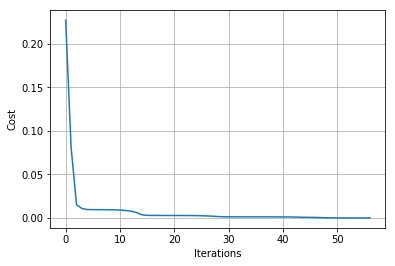

In [84]:
# We can see the cost decrease as we iterate
plt.plot(T.J)
plt.grid(1)
plt.ylabel('Cost')
plt.xlabel('Iterations')

In [86]:
# Now, if we run our training data through our network...
network.forward(X)

array([[ 0.74997186],
       [ 0.82003932],
       [ 0.93001249]])

In [87]:
# Our predictions are correct!
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

But just because it fits our training data, that doesn't mean it's a good fit for the real world...!

# Overfitting
Overfitting: It models the training data too well. Noise or randomness in the training data is picked up and learned by the model so that it fails to predict future data correctly.

We must consider our process:
We train our network based on samples of real world data. For example, we measure that we sleep for 3 hours and study for 5, and get 60 on our test. Does this mean that sleeping for 3 hours and studying for 5 hours would always result in a score of 60? Of course not. There are many other variables too. Variables we didn't measure. Maybe we guessed a few questions and got lucky, or also listened well in lectures.

Slightly more formally, we could say:

Observations = signal and noise

We're interested in interpreting the signal, but there will be some noise obscuring things.


Imagine our test:
The observation might be, 60 points. Maybe 50 points are due to aptitude (signal), but 10 points are due to luck (noise).

So how do we train our model on the signal, and not the noise?

Example:
Here, due to the data fed in, it looks like studying more will push the score down.

<img src="images/neural_net_notes/studymore.jpg" alt="" style="width: 400px;"/>

So how do we know if we're overfitting or not?

We split the data into __training data__ and __testing data__.

We only feed in training data, and then check it against our testing data.

We can compare the testing error (cost) against the training error to see where overfitting occurs.

## Fixing overfitting
One approach is to just throw more data at it.
Rule of thumb: number of examples needed = 10 * degrees of freedom

E.g., since we have 9 weights that can change, we need at least 90 observations.

Another approach is __regularization__.
This involves adding a term to our cost function that penalizes overly complex models _(models with too much noise?)_.

Can be done by adding the square of the weights to the cost function, so models with large magnitudes of weights cost more.